In [52]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
from ISLP import load_data
from ISLP.models import (
    ModelSpec as MS,
    summarize,
    poly,
)

In [4]:
boston = load_data("Boston")
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [12]:
X = pd.DataFrame({
    'intercept': np.ones(len(boston)),
    'lstat': boston['lstat']
})
y = boston['medv']
model = sm.OLS(y, X)
res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           5.08e-88
Time:                        13:26:14   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# getting predictions 
test_data = pd.DataFrame({
    'intercept': [1, 1, 1, 1],
    'lstat': [5, 10, 15, 20],
})
predictions = res.get_prediction(test_data)
test_data['predictions'] = predictions.predicted_mean
test_data['confidence_interval'] = [f"{np.round(ci[0], 3)} ~ {np.round(ci[1], 3)}" for ci in predictions.conf_int(alpha=0.05)]
test_data['prediction_interval'] = [f"{np.round(pi[0], 3)} ~ {np.round(pi[1], 3)}" for pi in predictions.conf_int(obs=True, alpha=0.05)]


In [25]:
test_data.head(5)

,intercept,lstat,predictions,confidence_interval,prediction_interval
0,1,5,29.803594,29.007 ~ 30.6,17.566 ~ 42.042
1,1,10,25.053347,24.474 ~ 25.633,12.828 ~ 37.279
2,1,15,20.303101,19.732 ~ 20.875,8.078 ~ 32.528
3,1,20,15.552854,14.774 ~ 16.332,3.316 ~ 27.79


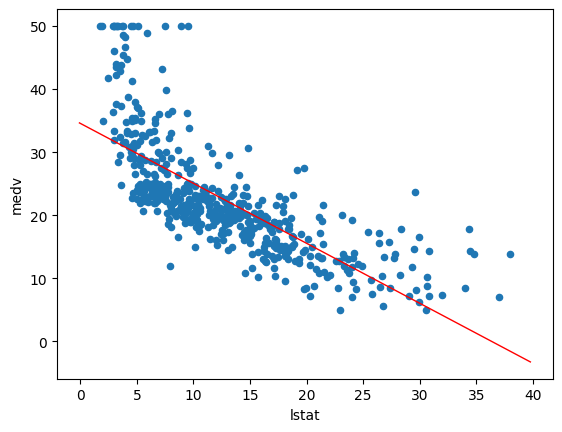

In [41]:
def abline(ax, a: float, b: float, *args, **kwargs) -> None:
    """
    Adds a straight line of the form ax + b
    to an existing plot defind in ax. 
    """
    xlim = ax.get_xlim()
    ylim = [a * xlim[0] + b, a * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = boston.plot.scatter('lstat', 'medv')
abline(
    ax=ax, 
    a=res.params.iloc[1],
    b=res.params.iloc[0],
    linewidth=1,
    color='red'
)




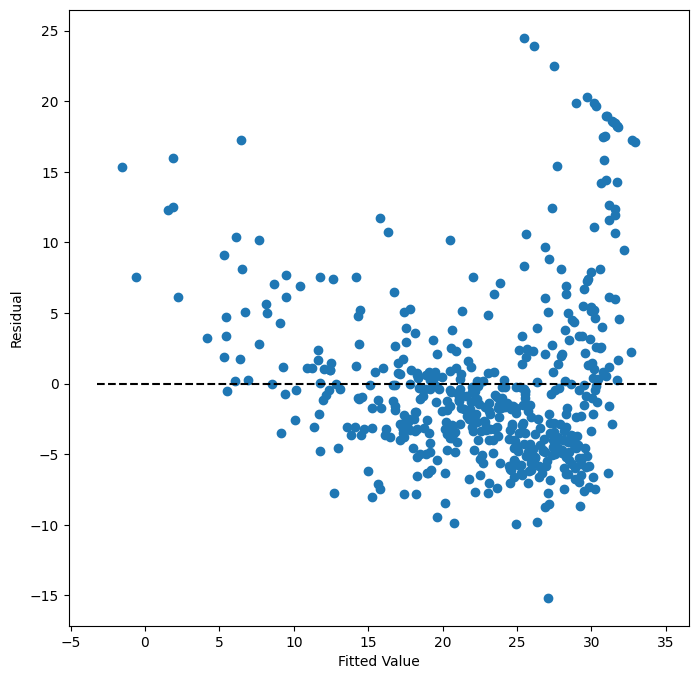

In [39]:
_, ax = subplots(figsize=(8, 8))
ax.scatter(res.fittedvalues, res.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
abline(ax, 0, 0, color='black', ls='--')

# the shape of the residuals show non linearity 

Text(0, 0.5, 'Leverage')

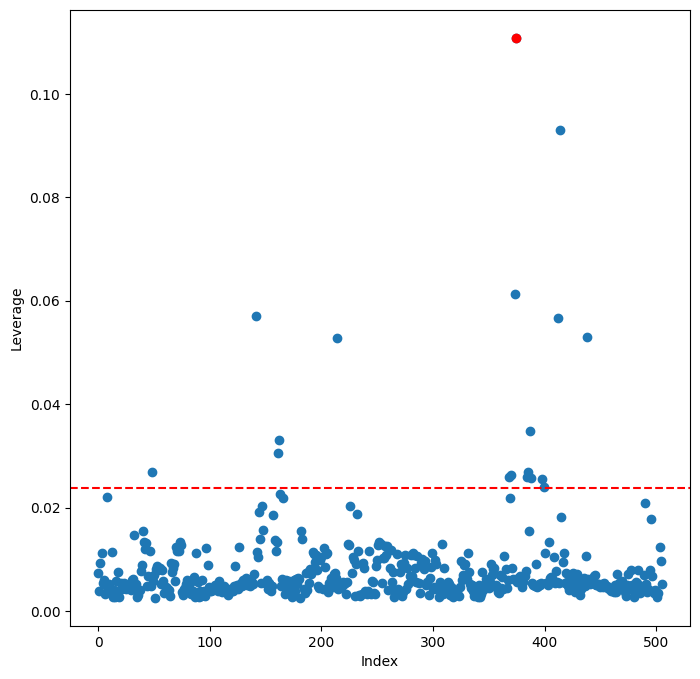

In [88]:
_, ax = subplots(figsize=(8,8))
infl = res.get_influence()
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
# highlight the max entry
ax.scatter(np.argmax(infl.hat_matrix_diag), infl.hat_matrix_diag[np.argmax(infl.hat_matrix_diag)], c='r')
# add line at 3 times the mean for suspicious points
ax.axhline(3 * np.mean(infl.hat_matrix_diag), c='r', ls='--')
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

# leverage is measured based on its deviation from (p + 1) / n, which should be the average value for leverage
# (p + 1) / n = 2 / 500 = 0.004
# rule of thumb is to flag observations with leverage greater than 3 times the mean as suspicious
# highest point of leverage is about 6 times.

In [54]:
# Multiple Linear Regression  
X = boston[['lstat', 'age']]
X['intercept'] = np.ones(X.shape[0])
X = X[['intercept', 'lstat', 'age']]
model = sm.OLS(y, X)
res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           2.98e-88
Time:                        11:11:43   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X = boston.drop('medv', axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          2.23e-133
Time:                        00:09:50   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

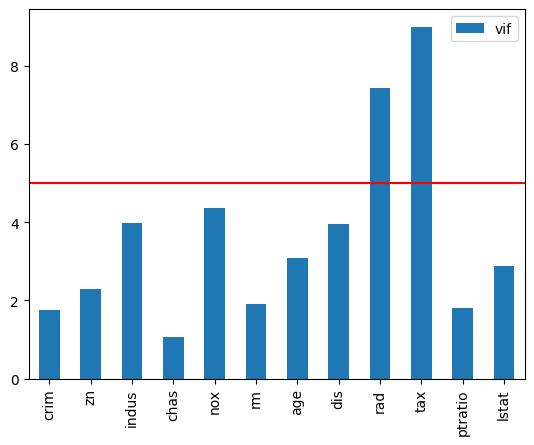

In [62]:
# variance inflation factor (vif)  
# variance inflation factor regresses each regressor with the other regressors to 
# check if a regressor is a linear product of the others. 
# A value above 5 indicates colinearity 
vifs_per_col = [variance_inflation_factor(X, i)
                for i in range(1, len(X.columns))]
vif = pd.DataFrame({'vif': vifs_per_col}, index=X.columns[1:])

ax = vif.plot.bar()
abline(ax, 0, 5, color='red')

In [75]:
# linear model 
X = boston[['lstat', 'age']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
linear_model_fit = model.fit()
linear_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           2.98e-88
Time:                        02:05:28   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# interactions 
X = boston[['lstat', 'age']]
X = sm.add_constant(X)
X['lstat:age'] = X['lstat'] * X['age']

model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           4.86e-88
Time:                        00:56:17   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# non linear transforms 
X = boston[['age', 'lstat']]
X['lstat**2'] = X['lstat'] ** 2
X = sm.add_constant(X)

model = sm.OLS(y, X)
nonlinear_model_fit = model.fit()
nonlinear_model_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.666    
Dependent Variable: medv             AIC:                3129.9760
Date:               2024-08-15 02:05 BIC:                3146.8822
No. Observations:   506              Log-Likelihood:     -1561.0  
Df Model:           3                F-statistic:        337.3    
Df Residuals:       502              Prob (F-statistic): 7.03e-120
R-squared:          0.668            Scale:              28.218   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const         41.2885    0.8732   47.2835  0.0000  39.5729  43.0041
age            0.0703    0.0109    6.4711  0.0000   0.0489   0.0916
lstat         -2.6883    0.1311  -20.5022  0.0000  -2.9459  -2.4307
lstat**2       0.0495    0.0037   13.3146  0.0000   0.0422   0.0568
------------------------------------------------------------------
Omnibus:              81.499       Durbin-Watson:          1.066  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       155.528
Skew:                 0.918        Prob(JB):               0.000  
Kurtosis:             5.001        Condition No.:          1197   
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [78]:
# anova_lm to quantify extent of improvement from linear model 
anova_lm(linear_model_fit, nonlinear_model_fit)

# H0: bigger model (nonlinear model) is not superior to the base model
# H1: bigger model is superior 
# results: F-statistic indicates the improvement in the model performance is not 
# a fluke 

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


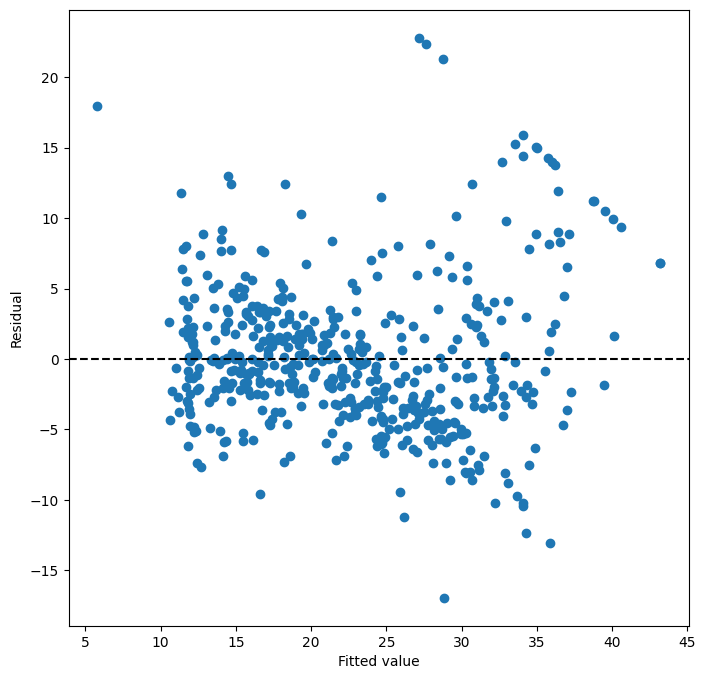

In [79]:
_, ax = subplots(figsize=(8,8))
ax.scatter(nonlinear_model_fit.fittedvalues, nonlinear_model_fit.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

# we can tell that the nonlinearity in the residuals is gone, and the residuals
# seemed to display no apparent pattern

In [89]:
carseats = load_data('Carseats')
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [109]:
# dummy variables 

X = carseats.drop('Sales', axis=1)
y = carseats['Sales']
X['Income * Advertising'] = X['Income'] * X['Advertising']
X['Price * Age'] = X['Price'] * X['Age']
dummies_shelve = pd.get_dummies(X['ShelveLoc'], prefix='ShelveLoc').astype(int)
dummies_urban = pd.get_dummies(X['Urban'], prefix='Urban').astype(int)
dummies_us = pd.get_dummies(X['US'], prefix='US').astype(int)
X = X.drop(['ShelveLoc', 'US', 'Urban'], axis=1)
X = pd.concat([X, dummies_shelve, dummies_urban, dummies_us], axis=1)
X



,CompPrice,Income,Advertising,Population,Price,Age,Education,Income * Advertising,Price * Age,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,803,5040,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,768,5395,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,350,4720,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,400,5335,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,192,4864,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1836,4224,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,69,6600,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,312,6360,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,553,4750,1,0,0,0,1,0,1


In [110]:
model = sm.OLS(y, X)
res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          6.14e-166
Time:                        02:57:54   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
CompPrice                0.0929      0.004     22.567      0.000       0.085       0.101
Income                   0.0109      0.003      4.183      0.000       0.006       0.016
Advertising              0.0702      0.023      3.107      0.002       0.026       0.115
Population               0.0002      0.000      0.433      0.665      -0.001       0.001
Price                   -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                     -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education               -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income * Advertising     0.0008      0.000      2.698      0.007       0.000       0.001
Price * Age              0.0001      0.000      0.801      0.424      -0.000       0.000
ShelveLoc_Bad           -0.0588      0.271     -0.217      0.828      -0.591       0.473
ShelveLoc_Good           4.7899      0.260     18.443      0.000       4.279       5.301
ShelveLoc_Medium         1.8945      0.256      7.413      0.000       1.392       2.397
Urban_No                 3.2427      0.375      8.637      0.000       2.505       3.981
Urban_Yes                3.3829      0.383      8.844      0.000       2.631       4.135
US_No                    3.3916      0.379      8.954      0.000       2.647       4.136
US_Yes                   3.2340      0.385      8.390      0.000       2.476       3.992
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     3.07e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.82e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""